In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
G = nx.Graph() # Graph是节点的集合以及确定的节点对(边、链接等) (一个节点集合一个边集)

# Graph的结构
根据Graph的定义，一个Graph包含一个节点集合一个边集<br>
在networkx中，一个节点可以是任意hash对象(除了None对象，一个边可以关联任意对象<br>
节点和边能存储任意类型字典的属性和任意其他丰富类型的数据

- Graph:无向图图
- DiGraph:有向图
- MultiGraph：多重无向图(两个接地那之间的边数多于一条，又允许顶点通过同一条边和自己关联)
- MultiDiGraph:多重图的有向版本


In [3]:
G = nx.Graph # 创建无向图
G = nx.DiGraph() 
G = nx.MultiGraph()
G = nx.MultiDiGraph()

G.clear() #清空图

# 基本操作

## 无向图
如果添加的节点和边是已经存在的，是不会报错的，NetworkX会自动忽略掉已经存在的边和节点的添加。

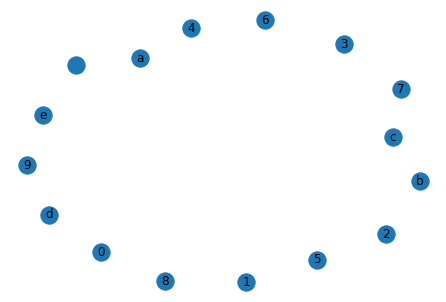

In [4]:
G = nx.Graph()
G.add_node('a') # 添加一个节点 
G.add_nodes_from(['b','c','d','e']) # 添加点集合
# G.add_cycle(['f','g','h','j']) #加环

H = nx.path_graph(10) # 返回由10个节点挨个链接的无向图，所以有9个边
G.add_nodes_from(H) #创建一个子图H 加入G
G.add_node(H) # 直接将图作为节点

nx.draw(G,with_labels=True)
plt.show()

In [5]:
# 访问节点
print('图中所有的节点',G.nodes())
print('图中节点的个数',G.number_of_nodes())

图中所有的节点 ['a', 'b', 'c', 'd', 'e', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x12a19d050>]
图中节点的个数 16


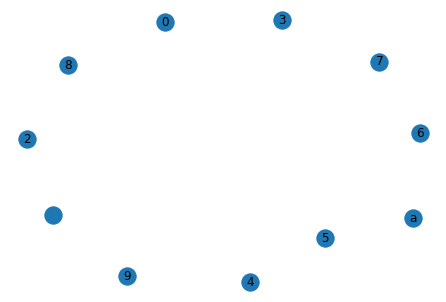

In [6]:
# 删除节点
G.remove_node(1) # 删除指定节点
G.remove_nodes_from(['b','c','d','e']) #删除指定节点
nx.draw(G, with_labels=True)
plt.show()

# 边
https://blog.csdn.net/weixin_39972567/article/details/111583018
https://www.cnblogs.com/HeZhengfa/p/10296508.html

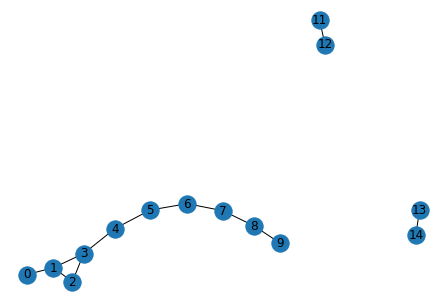

In [7]:
F = nx.Graph()
F.add_edge(11,12) 

e = (13,14)
F.add_edge(*e) #python解包裹过程

F.add_edges_from([(1,2),(1,3)])

# 通过添加任何ebunch来添加边
F.add_edges_from(H.edges()) #不能写成 F.add_edges_from(H)

def drawGraph(graph):
    nx.draw(graph, with_labels=True)
    plt.show()
    
drawGraph(F)

In [8]:
# 访问边
print('图中所有的边',F.edges())
print('图中边的个数',F.number_of_edges())

图中所有的边 [(11, 12), (13, 14), (1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
图中边的个数 12


In [9]:
# 快速遍历每条边，可以使用临界迭代器实现，对于无向图，每一条边相当于两条有向边
FG = nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125), (1,3,0.75), (2,4,1.2), (3,4,0.275)])
for n,nbrs in FG.adjacency():
    print(nbrs)
    for nbr, eattr in nbrs.items():
        print(eattr)
        data = eattr['weight']
        print('(%d, %d, %0.3f)' % (n, nbr, data))

{2: {'weight': 0.125}, 3: {'weight': 0.75}}
{'weight': 0.125}
(1, 2, 0.125)
{'weight': 0.75}
(1, 3, 0.750)
{1: {'weight': 0.125}, 4: {'weight': 1.2}}
{'weight': 0.125}
(2, 1, 0.125)
{'weight': 1.2}
(2, 4, 1.200)
{1: {'weight': 0.75}, 4: {'weight': 0.275}}
{'weight': 0.75}
(3, 1, 0.750)
{'weight': 0.275}
(3, 4, 0.275)
{2: {'weight': 1.2}, 3: {'weight': 0.275}}
{'weight': 1.2}
(4, 2, 1.200)
{'weight': 0.275}
(4, 3, 0.275)


In [10]:
next(iter(FG.adjacency()))

(1, {2: {'weight': 0.125}, 3: {'weight': 0.75}})

In [11]:
# 筛选weight小于0.5的边
FG = nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125), (1,3,0.75), (2,4,1.2), (3,4,0.275)])
for n, nbrs in FG.adjacency():
    for nbr, eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5:
            print('(%d, %d, %0.3f)' % (n,nbr,data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.275)
(4, 3, 0.275)


In [12]:
#一种方便的访问所有边的方法:
for u,v,d in FG.edges(data = 'weight'):
    print((u,v,d))

(1, 2, 0.125)
(1, 3, 0.75)
(2, 4, 1.2)
(3, 4, 0.275)


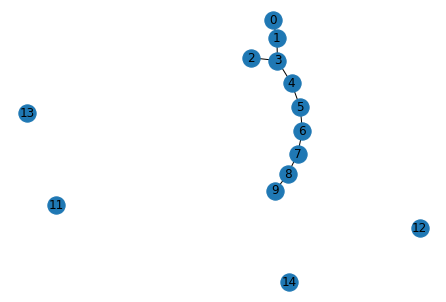

In [13]:
# 删除边
F.remove_edge(1,2)
F.remove_edges_from([(11,12),(13,14)])
drawGraph(F)

# 属性
- 属性诸如weight,labels,colors,或者任何对象，你都可以附加到图、节点或边上。

- 对于每一个图、节点和边都可以在关联的属性字典中保存一个（多个）键-值对。

- 默认情况下这些是一个空的字典，但是我们可以增加或者是改变这些属性。

In [14]:
# 图的属性
G = nx.Graph(day = 'Monday') # 可以再创建图时，分配图的属性
print(G.graph)

G.graph['day'] = 'Friday' # 也可以修改已有的属性
print(G.graph)

G.graph['name'] = 'time' #随时添加
print(G.graph)

{'day': 'Monday'}
{'day': 'Friday'}
{'day': 'Friday', 'name': 'time'}


In [15]:
# 节点的属性
G = nx.Graph(day='Monday')
G.add_node(1, index='1th') # 在添加节点时分配节点属性
print(G.nodes(data=True))

G.nodes[1]['index'] = '0th' # 修改
print(G.nodes(data=True))

G.add_nodes_from([2,3],index='2/3th') #从集合中添加节点时分配属性
print(G.nodes(data=True))

[(1, {'index': '1th'})]
[(1, {'index': '0th'})]
[(1, {'index': '0th'}), (2, {'index': '2/3th'}), (3, {'index': '2/3th'})]


In [16]:
# 边的属性
G = nx.Graph(day='monday')
G.add_edge(1,2,weight=10) # 在添加边时分配属性
print(G.edges(data=True))
print(G.nodes(data=True))

G.add_edges_from([(1,3),(4,5)],len=22)
print(G.edges(data='len'))

G.add_edges_from([(3,4,{'hight':10}), (1,4,{'high':'unknow'})])
print(G.edges(data=True))

G[1][2]['weight']=10000
print(G.edges(data=True))

[(1, 2, {'weight': 10})]
[(1, {}), (2, {})]
[(1, 2, None), (1, 3, 22), (4, 5, 22)]
[(1, 2, {'weight': 10}), (1, 3, {'len': 22}), (1, 4, {'high': 'unknow'}), (3, 4, {'hight': 10}), (4, 5, {'len': 22})]
[(1, 2, {'weight': 10000}), (1, 3, {'len': 22}), (1, 4, {'high': 'unknow'}), (3, 4, {'hight': 10}), (4, 5, {'len': 22})]


# 其他图

In [17]:
# 有向图转无向图
H = G.to_undirected()
H = nx.Graph(G)

# 无向图转化成有向图
F = H.to_directed()
F = nx.DiGraph(H)

# Function

## 图
- degree(G[, nbunch, weight])：返回单个节点或nbunch节点的度数视图。 

- degree_histogram(G)：返回每个度值的频率列表。

- density(G)：返回图的密度。

- info(G[, n])：打印图G或节点n的简短信息摘要。

- create_empty_copy(G[, with_data])：返回图G删除所有的边的拷贝。

- is_directed(G)：如果图是有向的，返回true。

- add_star(G_to_add_to, nodes_for_star, **attr)：在图形G_to_add_to上添加一个星形。

- add_path(G_to_add_to, nodes_for_path, **attr)：在图G_to_add_to中添加一条路径。

- add_cycle(G_to_add_to, nodes_for_cycle, **attr)：向图形G_to_add_to添加一个循环。

## 节点
- nodes(G)：在图节点上返回一个迭代器。

- number_of_nodes(G)：返回图中节点的数量。

- all_neighbors(graph, node)：返回图中节点的所有邻居。

- non_neighbors(graph, node)：返回图中没有邻居的节点。

- common_neighbors(G, u, v)：返回图中两个节点的公共邻居。

## 边
- edges(G[, nbunch])：返回与nbunch中的节点相关的边的视图。

- number_of_edges(G)：返回图中边的数目。

- non_edges(graph)：返回图中不存在的边。

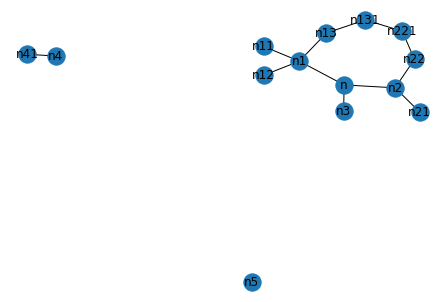

In [18]:
# 在networkx中列出特定的节点或边缘
G = nx.Graph()
G.add_edges_from([('n','n1'),('n','n2'),('n','n3')])
G.add_edges_from([('n4', 'n41'), ('n1', 'n11'), ('n1', 'n12'), ('n1', 'n13')])
G.add_edges_from([('n2', 'n21'), ('n2', 'n22')])
G.add_edges_from([('n13', 'n131'), ('n22', 'n221')])
G.add_edges_from([('n131', 'n221'), ('n221', 'n131')])
G.add_node('n5')
drawGraph(G)

In [26]:
# 使用out_degree查询所有带子项的节点：
[k for k,v in G.degree() if v>0]

['n',
 'n1',
 'n2',
 'n3',
 'n4',
 'n41',
 'n11',
 'n12',
 'n13',
 'n21',
 'n22',
 'n131',
 'n221']

In [28]:
# 所有没有孩子的节点
[k for k,v in G.degree() if v==0]

['n5']

# 经典图论算法
## 最短路径

生成一个空的有向图
为这个网络添加节点。。
在网络中添加带权的边
给网络设置布局


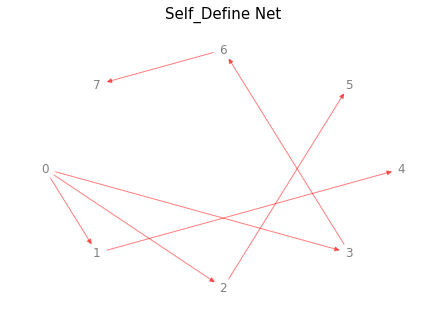

In [32]:
#自定义网络
row=np.array([0,0,0,1,2,3,6])
col=np.array([1,2,3,4,5,6,7])
value=np.array([1,2,1,8,1,3,5])

print('生成一个空的有向图')
G=nx.DiGraph()
print("为这个网络添加节点。。")
for i in range(0,np.size(col)+1):
    G.add_node(i)
print("在网络中添加带权的边")
for i in range(np.size(row)):
    G.add_weighted_edges_from([(row[i],col[i],value[i])])
    
print("给网络设置布局")
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, node_color='white', edge_color='red', node_size=400,alpha=0.5)
plt.title('Self_Define Net',fontsize=15)
plt.show()

In [34]:
print('dijkstra找最短路径')
path = nx.dijkstra_path(G, source=0, target=7)
print('节点0到7的路径：',path)

dijkstra找最短路径
节点0到7的路径： [0, 3, 6, 7]


In [35]:
distance = nx.dijkstra_path_length(G, source=0, target=7)
distance

9

## 最小生成树
定义：一个有n个节点的连通图的生成树是原图的极小连通子图，且包含原图中的所有n个节点，且有保持图连通的最少的边。

In [36]:
def prim(G, s):
    dist = {} #dist记录到节点的最小距离
    parent = {} # parent记录最小生成树的双亲表
    Q = list(G.nodes()) # Q 包含所有未被生成树覆盖的节点
    MAXDIST=99999 # 表两点不邻接
    
    # 初始化数据
    # 所有节点的最小距离设置为MAXDIST 父节点为None
    for v in G.nodes():
        dist[v] = MAXDIST
        parent[v] = None
    
    #到开始节点s的距离设置为0
    dist[s] = 0
    
    # 不断从Q中取出最近的节点加入最小生成树
    # 当Q为空时停止循环，算法结束
    while Q:
        # 取出最近的节点u，把u加到最小生成树
        u = Q[0]
        for v in Q:
            if(dist[v] < dist[u]):
                u = v
        Q.remove(u)
        
        #更新u的邻接节点的最小距离
        for v in G.adj[u]:
            if (v in Q) and (G[u][v]['weight'] < dist[v]):
                parent[v] = u
                dist[v] = G[u][v]['weight']
    return parent

# 画图

In [38]:
from graph.Graph import Graph
from algorithms_prev.dijkstra_prev import *
from algorithms_prev.forest_pred import *
from algorithms_prev.abm_pred import *

options = {
    'node_color': 'red',
    'node_size': 300,
    'with_labels': True,
}
G = createGraph(20, 5, 0.1)
g, rings = getRelaxTree(G)

#  画生成图
plt.sca(plt.subplot(121))
nx.draw_shell(G, **options)

#  画松弛树
plt.sca(plt.subplot(122)) 
pos = nx.shell_layout(g)
li = list(g.nodes)
nx.draw_networkx_nodes(g, pos, nodelist=li)
nx.draw_networkx_edges(g, pos)

#  将R节点用不同颜色标记
R = []
for n in g.nodes:
    if 'isR' in G.nodes[n]:
        R.append(n)
nx.draw_networkx_nodes(g, pos, nodelist=R, label='a', node_color='g', node_size=500)


def getWeight(i):
    for e in g.edges:
        if e[1] == i:
            return (G.edges[e]['weight'])
    return 0


def getMiddlePos(e, p):
    x = np.array(p[e[0]])
    y = np.array(p[e[1]])
    z = (x + y) / 2
    return tuple(z)

#  绘制节点号
lables = {}
for i in li:
    lables[i] = i
nx.draw_networkx_labels(g, pos, lables)

#  绘制各边权重
for i in li:  # 修改标签为各边权重
    lables[i] = getWeight(i)
lables[0] = ''

pos2 = {}
for e in g.edges:
    pos2[e[1]] = getMiddlePos(e, pos)
    pos2[0] = (0, 0)
nx.draw_networkx_labels(g, pos2, lables, font_color='b')
plt.show()

ModuleNotFoundError: No module named 'graph'